In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [127]:
train_data = pd.read_excel('Data_Train.xlsx')

pd.set_option('display.max_columns', None)

In [128]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [129]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [130]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [131]:
train_data[train_data['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [132]:
train_data.dropna(inplace=True)

In [133]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [134]:
import datetime as dt

train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [135]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [136]:
train_data.drop(labels=['Date_of_Journey'], inplace=True, axis=1)

In [137]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [138]:
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

In [139]:
train_data.drop(labels=['Dep_Time'], axis=1, inplace=True)

In [140]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [141]:
train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

train_data.drop(labels=['Arrival_Time'], inplace=True, axis=1)

In [142]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [143]:
k = []
for duration in train_data['Duration']:
    if 'h' not in duration:
        j = train_data.loc[train_data['Duration']==duration].index[0]
        k.append(j)

In [144]:
train_data.iloc[k]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,16,50,16,55


In [145]:
k = []
for duration in train_data['Duration']:
    if 'm' not in duration:
        j = train_data.loc[train_data['Duration']==duration].index[0]
        k.append(j)

In [146]:
train_data.iloc[k]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
18,Air India,Delhi,Cochin,DEL → CCU → BOM → COK,23h,2 stops,No info,13381,12,6,20,15,19,15
33,Jet Airways,Delhi,Cochin,DEL → NAG → BOM → COK,22h,2 stops,In-flight meal not included,10919,15,6,14,35,12,35
44,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,12h,1 stop,No info,13062,21,3,9,0,21,0
53,IndiGo,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,3943,18,6,21,15,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,Air India,Delhi,Cochin,DEL → CCU → BOM → COK,23h,2 stops,No info,13381,12,6,20,15,19,15
134,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,14h,1 stop,No info,14067,21,5,11,30,1,30
2172,Air India,Delhi,Cochin,DEL → RPR → NAG → BOM → COK,38h,3 stops,No info,10703,18,5,5,15,19,15
110,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h,1 stop,No info,13555,18,3,14,5,5,5


In [147]:
k = []
for duration in train_data['Duration']:
    if 'h' not in duration and 'm' not in duration:
        j = train_data.loc[train_data['Duration']==duration].index[0]
        k.append(j)

In [148]:
train_data.iloc[k]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min


In [149]:
for duration in train_data['Duration']:
    if 'h' not in duration:
        j = train_data.loc[train_data['Duration']==duration].index[0]
        train_data['Duration'].iloc[j] = "0h " + duration

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19136\1304943844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Duration'].iloc[j] = "0h " + duration


In [150]:
for duration in train_data['Duration']:
    if 'm' not in duration:
        j = train_data.loc[train_data['Duration']==duration].index[0]
        train_data['Duration'].iloc[j] = duration + " 0m"

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19136\1418484320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Duration'].iloc[j] = duration + " 0m"


In [151]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [152]:
hour = []
mins = []

for duration in train_data['Duration']:
    h = duration.split('h')[0]
    hour.append(int(h))
    m = duration.split('h')[1].split('m')[0].strip()
    if m == '':
        mins.append(0)
    else:
        mins.append(int(m))

In [153]:
hour

[2,
 7,
 19,
 5,
 4,
 2,
 15,
 21,
 25,
 7,
 13,
 2,
 2,
 12,
 2,
 26,
 4,
 22,
 23,
 20,
 5,
 15,
 2,
 2,
 13,
 15,
 5,
 5,
 2,
 2,
 2,
 13,
 2,
 22,
 5,
 10,
 5,
 2,
 6,
 11,
 11,
 8,
 22,
 2,
 12,
 2,
 2,
 2,
 16,
 19,
 3,
 25,
 2,
 3,
 2,
 16,
 15,
 2,
 6,
 25,
 12,
 27,
 10,
 10,
 2,
 10,
 2,
 1,
 13,
 2,
 1,
 26,
 7,
 13,
 5,
 2,
 2,
 1,
 19,
 2,
 14,
 2,
 22,
 9,
 10,
 21,
 5,
 18,
 12,
 18,
 9,
 11,
 17,
 13,
 2,
 2,
 2,
 3,
 1,
 16,
 12,
 12,
 7,
 24,
 2,
 8,
 7,
 14,
 30,
 19,
 15,
 2,
 12,
 10,
 5,
 15,
 16,
 10,
 2,
 11,
 2,
 1,
 14,
 20,
 2,
 23,
 18,
 16,
 2,
 2,
 8,
 16,
 3,
 2,
 14,
 23,
 21,
 21,
 2,
 10,
 8,
 8,
 5,
 8,
 11,
 27,
 8,
 20,
 4,
 8,
 2,
 24,
 2,
 12,
 12,
 23,
 16,
 2,
 25,
 26,
 28,
 2,
 25,
 9,
 4,
 15,
 1,
 2,
 9,
 2,
 22,
 3,
 11,
 9,
 12,
 17,
 5,
 25,
 20,
 13,
 18,
 1,
 9,
 16,
 2,
 4,
 5,
 24,
 2,
 2,
 4,
 25,
 6,
 3,
 18,
 2,
 12,
 19,
 2,
 8,
 9,
 2,
 3,
 2,
 12,
 2,
 9,
 2,
 9,
 29,
 2,
 5,
 9,
 10,
 4,
 1,
 11,
 2,
 2,
 10,
 2,
 10,
 1,
 9,
 

In [154]:
min

<function min>

In [155]:
len(hour)

10682

In [156]:
len(mins)

10682

In [157]:
train_data['Duration_hour'] = hour
train_data['Duration_min'] = mins

In [158]:
type(train_data['Duration_hour'])

pandas.core.series.Series

In [159]:
train_data.drop(labels=['Duration'], axis=1, inplace=True)

In [160]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [161]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

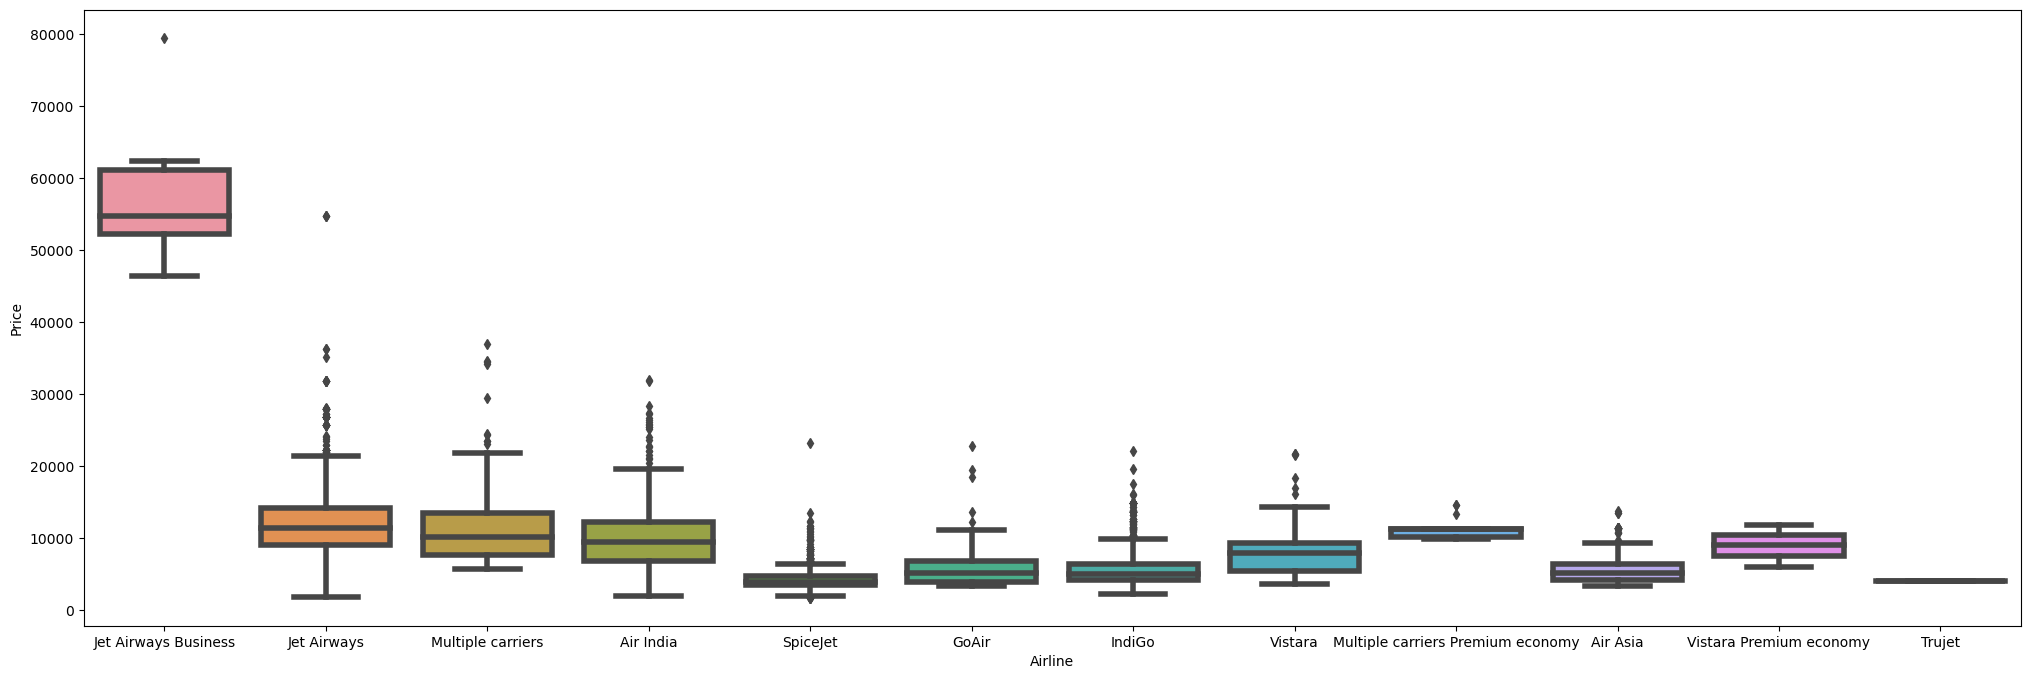

In [162]:
plt.figure(figsize=(25, 8))

sns.boxplot(data=train_data.sort_values(by='Price', ascending=False), x='Airline', y='Price', linewidth=4)
plt.show()

In [163]:
Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [164]:
train_data.sort_values(by='Price', ascending=False)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,79512,1,3,5,45,11,25,5,40
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,62427,1,3,5,45,12,25,6,40
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,1 stop,Business class,57209,1,3,9,45,14,25,4,40
1478,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,54826,18,3,18,40,0,45,6,5
5439,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,54826,1,3,16,55,23,0,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,Jet Airways,Mumbai,Hyderabad,BOM → HYD,non-stop,In-flight meal not included,1840,27,3,2,55,4,25,1,30
4066,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,21,3,22,45,0,10,1,25
10513,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,27,3,5,45,7,5,1,20
4274,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,27,3,22,45,0,10,1,25


In [165]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 2500x800 with 0 Axes>

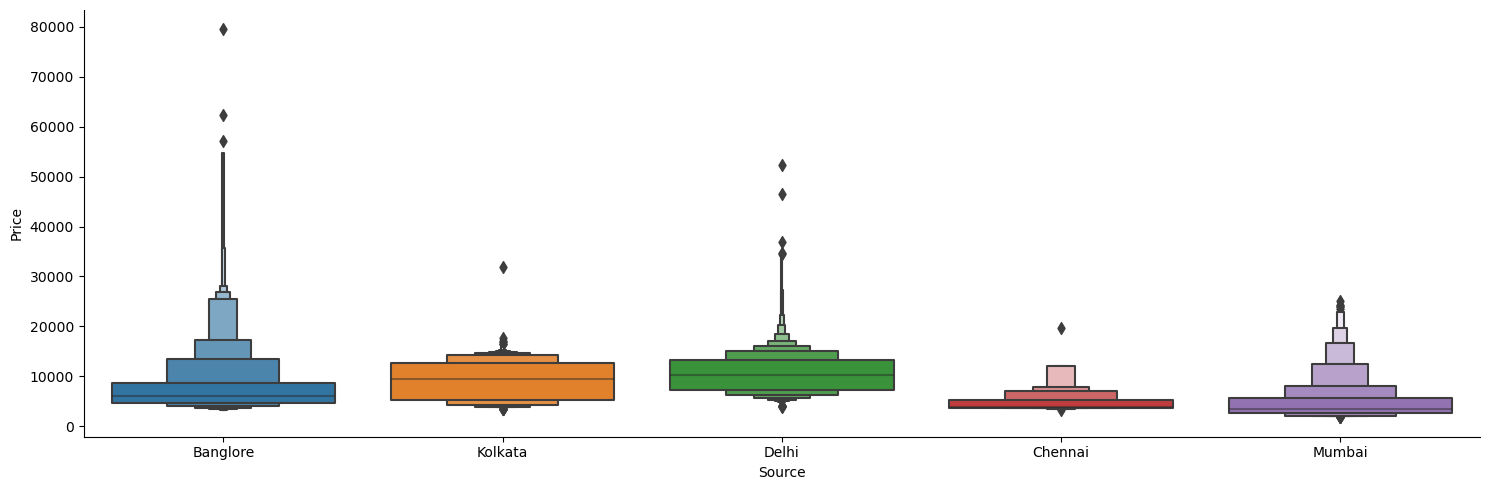

In [166]:
plt.figure(figsize=(25, 8))

sns.catplot(data=train_data, x='Source', y='Price', aspect=3, kind='boxen')
plt.show()

In [167]:
Source = train_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [168]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<Figure size 2500x800 with 0 Axes>

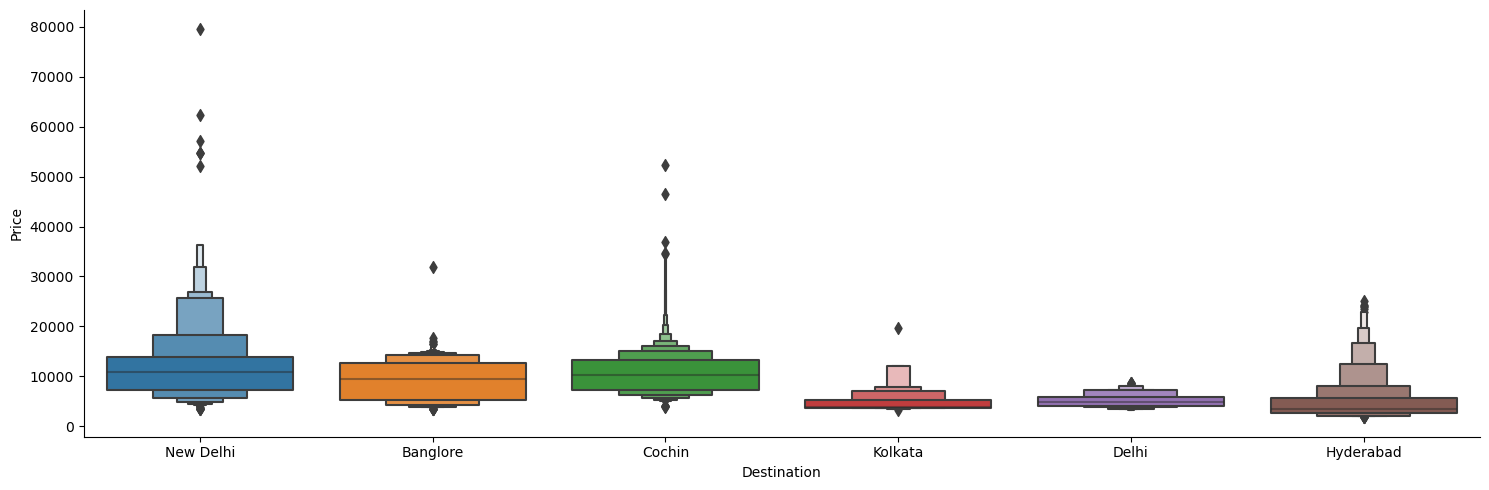

In [169]:
plt.figure(figsize=(25, 8))

sns.catplot(data=train_data, x='Destination', y='Price', aspect=3, kind='boxen')
plt.show()

In [170]:
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


<Axes: ylabel='Additional_Info'>

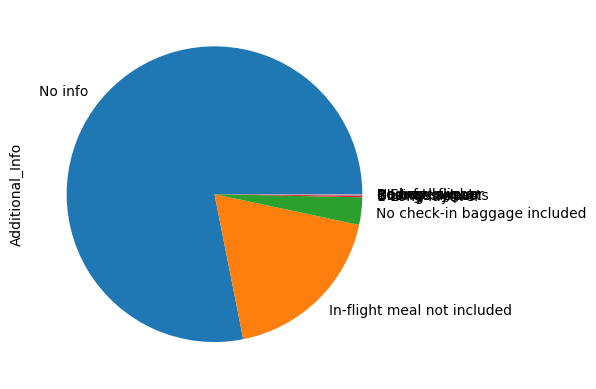

In [171]:
train_data['Additional_Info'].value_counts().plot(kind='pie')

In [172]:
train_data[['Additional_Info', 'Route', 'Total_Stops']]

,Additional_Info,Route,Total_Stops
0,No info,BLR → DEL,non-stop
1,No info,CCU → IXR → BBI → BLR,2 stops
2,No info,DEL → LKO → BOM → COK,2 stops
3,No info,CCU → NAG → BLR,1 stop
4,No info,BLR → NAG → DEL,1 stop
...,...,...,...
10678,No info,CCU → BLR,non-stop
10679,No info,CCU → BLR,non-stop
10680,No info,BLR → DEL,non-stop
10681,No info,BLR → DEL,non-stop


In [173]:
train_data.drop(labels=['Additional_Info', 'Route'], axis=1, inplace=True)

In [174]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [175]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [176]:
encode = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}

train_data['Total_Stops'] = train_data['Total_Stops'].apply(lambda x: encode[x])

In [177]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [178]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis=1)

In [179]:
data_train

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [180]:
data_train.drop(labels=['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [181]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [182]:
data_train.shape

(10682, 30)

In [183]:
test_data = pd.read_excel('Test_set.xlsx')

In [184]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [185]:
test_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [186]:
print('Test data info')
print("-"*75)
print(test_data.info())

print("NULL values :")
print("-"*75)
test_data.dropna(inplace=True)
print(test_data.isna().sum())


test_data['Journey_day'] = pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
test_data['Journey_month'] = pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.month
test_data.drop(labels=['Date_of_Journey'], inplace=True, axis=1)

test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop(labels=['Dep_Time'], axis=1, inplace=True)

test_data['Arrival_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_min'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop(labels=['Arrival_Time'], inplace=True, axis=1)

for duration in test_data['Duration']:
    if 'h' not in duration:
        j = test_data.loc[test_data['Duration']==duration].index[0]
        test_data['Duration'].iloc[j] = "0h " + duration

for duration in test_data['Duration']:
    if 'm' not in duration:
        j = test_data.loc[test_data['Duration']==duration].index[0]
        test_data['Duration'].iloc[j] = duration + " 0m"
        

hour = []
mins = []

for duration in test_data['Duration']:
    h = duration.split('h')[0]
    hour.append(int(h))
    m = duration.split('h')[1].split('m')[0].strip()
    if m == '':
        mins.append(0)
    else:
        mins.append(int(m))
test_data['Duration_hour'] = hour
test_data['Duration_min'] = mins
test_data.drop(labels=['Duration'], axis=1, inplace=True)


print('Airline')
print("-"*75)
print(test_data['Airline'].value_counts())
Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)

print('Source')
print("-"*75)
print(test_data['Source'].value_counts())
Source = test_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)

print('Destination')
print("-"*75)
print(test_data['Destination'].value_counts())
Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)


test_data.drop(labels=['Additional_Info', 'Route'], axis=1, inplace=True)

encode = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}
test_data['Total_Stops'] = test_data['Total_Stops'].apply(lambda x: encode[x])

data_test = pd.concat([test_data, Airline, Source, Destination], axis=1)
data_test.drop(labels=['Airline', 'Source', 'Destination'], axis=1, inplace=True)

print("Shape of test: ", data_test.shape)

Test data info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
NULL values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19136\2298211365.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Duration'].iloc[j] = "0h " + duration
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19136\2298211365.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Duration'].iloc[j] = duration + " 0m"


Airline
---------------------------------------------------------------------------
Jet Airways                          896
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Trujet                                 1
Name: Airline, dtype: int64
Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name:

In [187]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [188]:
data_train.shape

(10682, 30)

In [189]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [190]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [191]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

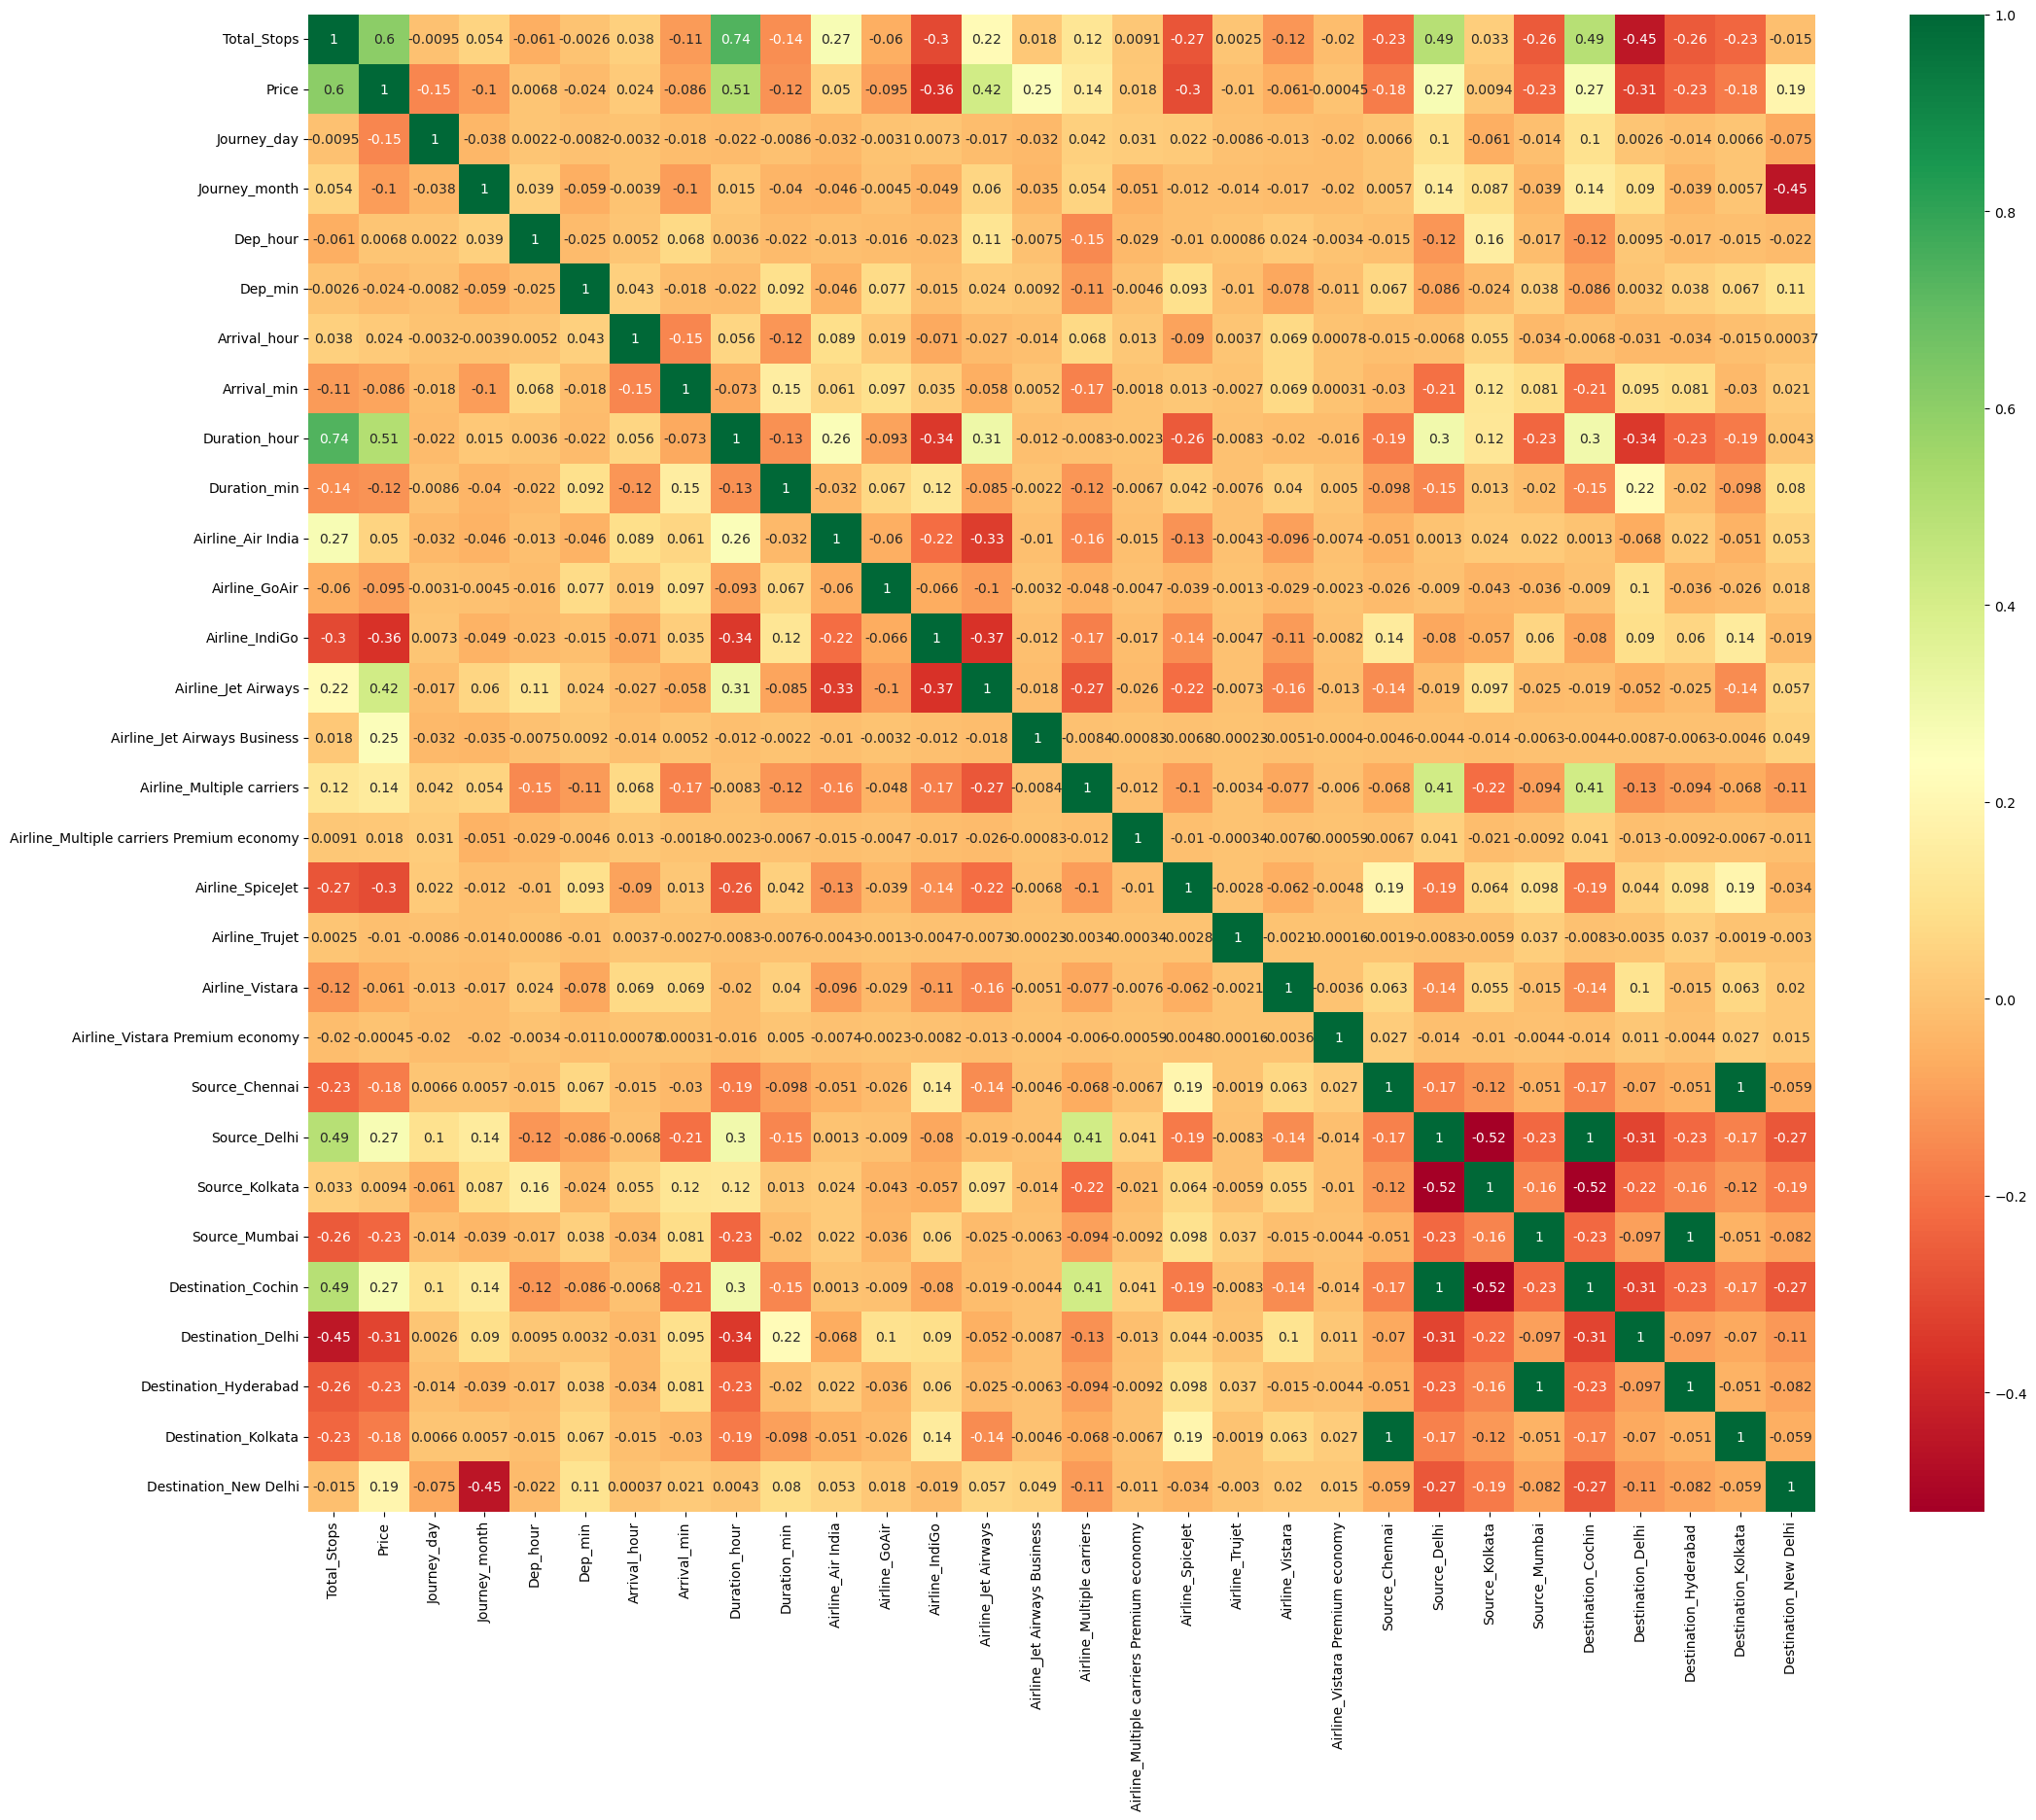

In [192]:
plt.figure(figsize=(25, 20))
sns.heatmap(data_train.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [193]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [194]:
feat = pd.DataFrame(selection.feature_importances_, columns=['feat_imp'])
feat['col_name'] = X.columns
feat = feat.sort_values(by='feat_imp', ascending=False)

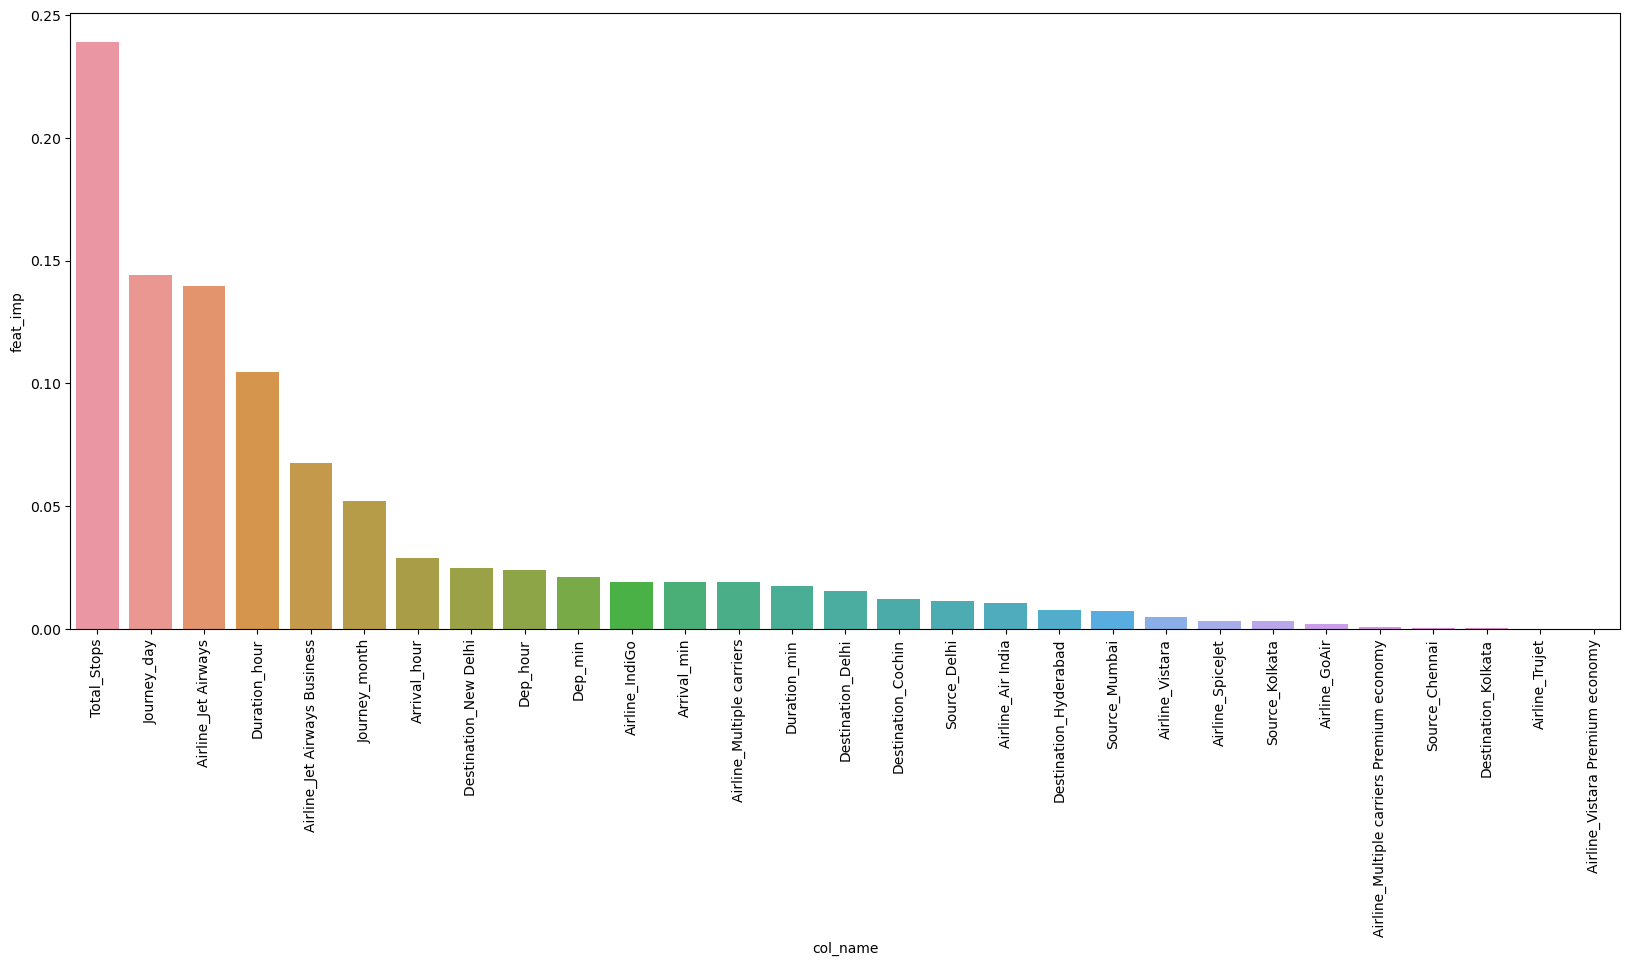

In [195]:
plt.figure(figsize=(20, 8))
sns.barplot(data=feat, x='col_name', y='feat_imp')
plt.xticks(rotation=90)
plt.show()

In [196]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
xtrain.shape

(8545, 29)

In [198]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)

RandomForestRegressor()

In [199]:
ypred = rfr.predict(xtest)

In [200]:
rfr.score(xtrain, ytrain)

0.953570603944333

In [201]:
rfr.score(xtest, ytest)

0.7925637508087447

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19136\3337729650.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytest-ypred)


<Axes: xlabel='Price', ylabel='Density'>

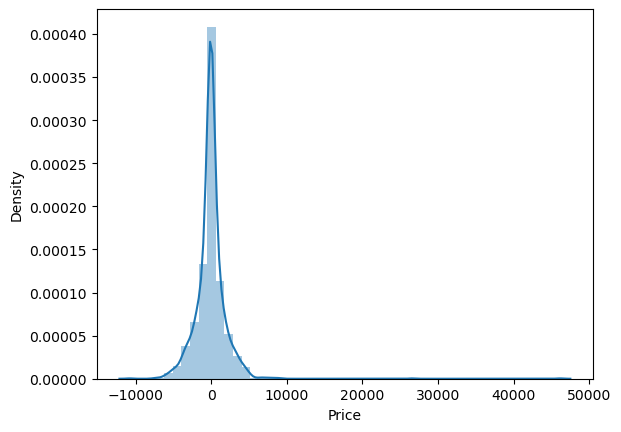

In [202]:
sns.distplot(ytest-ypred)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19136\2036120285.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred-ytest)


<Axes: xlabel='Price', ylabel='Density'>

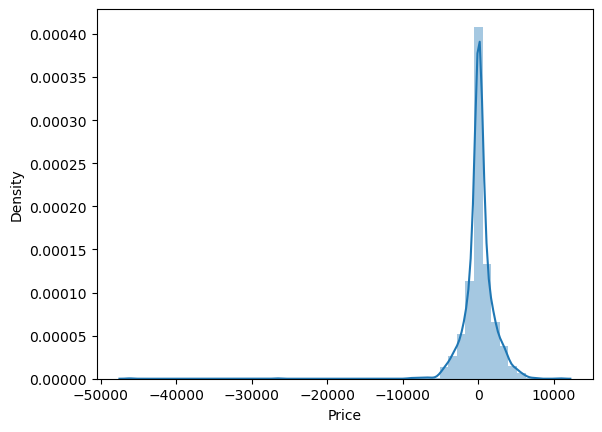

In [203]:
sns.distplot(ypred-ytest)

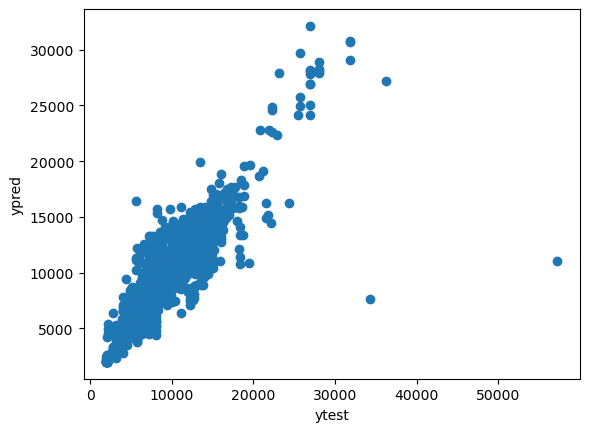

In [204]:
plt.scatter(ytest, ypred)
plt.xlabel('ytest')
plt.ylabel('ypred')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19136\3337729650.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytest-ypred)


<Axes: xlabel='Price', ylabel='Density'>

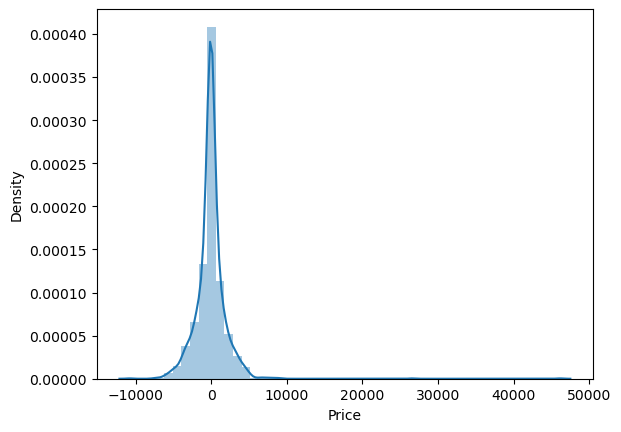

In [205]:
sns.distplot(ytest-ypred)

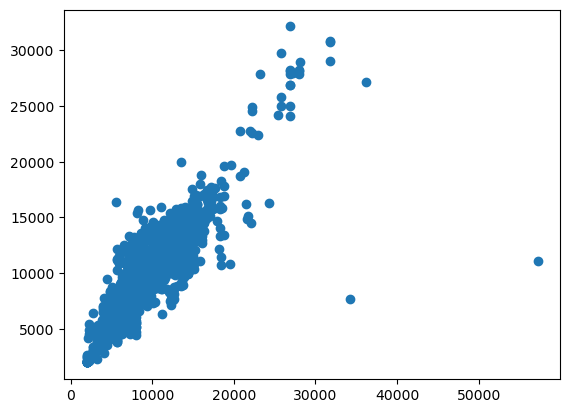

In [206]:
plt.scatter(ytest, ypred)
plt.show()

In [207]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(ytest, ypred))
print(mean_absolute_error(ytest, ypred))
print(mean_squared_error(ytest, ypred))

0.7925637508087447
1188.8650788446334
4472752.088734705


In [208]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [209]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]

min_samples_split = [int(x) for x in np.linspace(start=5, stop=100, num=20)]

min_samples_leaf = [4, 5, 7, 9]

In [210]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [211]:
rf_random = RandomizedSearchCV(estimator=rfr, param_distributions=random_grid, cv=5, n_iter=10, n_jobs=-1, random_state=42, verbose=2)

In [212]:
rf_random.fit(xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Lenovo\anacondanew\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 5, 7, 9],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30, 35, 40, 45,
                                                              50, 55, 60, 65,
                                                              70, 75, 80, 85,
                                                              90, 95, 100],
                                        'n_estimators': [100, 181, 263, 345,
                                                         427, 509, 590, 672,
                                                         754, 836, 918, 1000]},
                   random_state=42, verbose=2)

In [213]:
rf_random.best_params_

{'n_estimators': 181,
 'min_samples_split': 15,
 'min_samples_leaf': 7,
 'max_features': 'auto',
 'max_depth': 20}

In [214]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=20, max_features='auto', min_samples_leaf=7,
                      min_samples_split=15, n_estimators=181)

In [215]:
prediction = rf_random.predict(xtest)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19136\3776868912.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ytest-prediction)


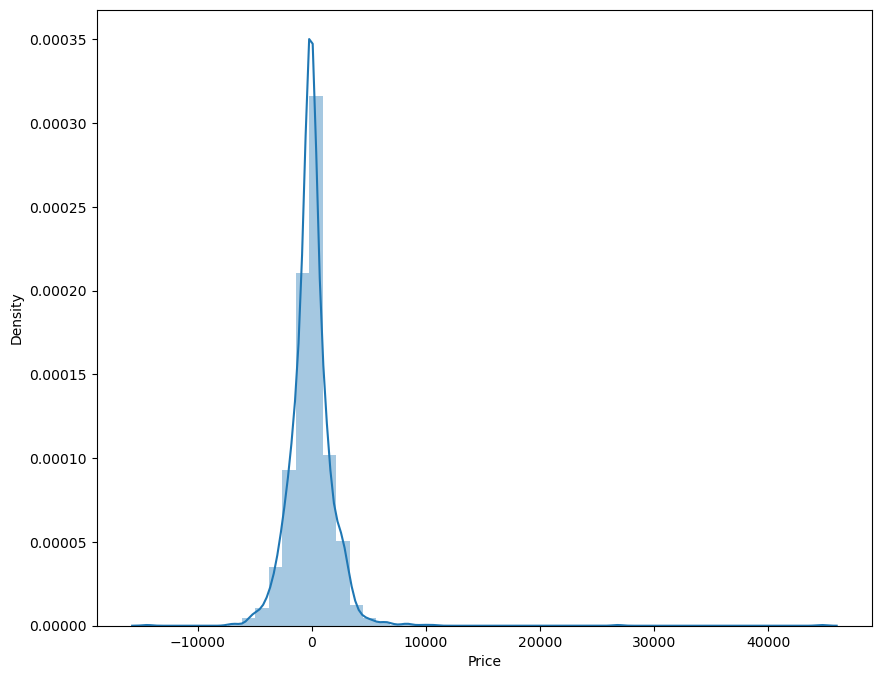

In [216]:
plt.figure(figsize=(10, 8))
sns.distplot(ytest-prediction)
plt.show()

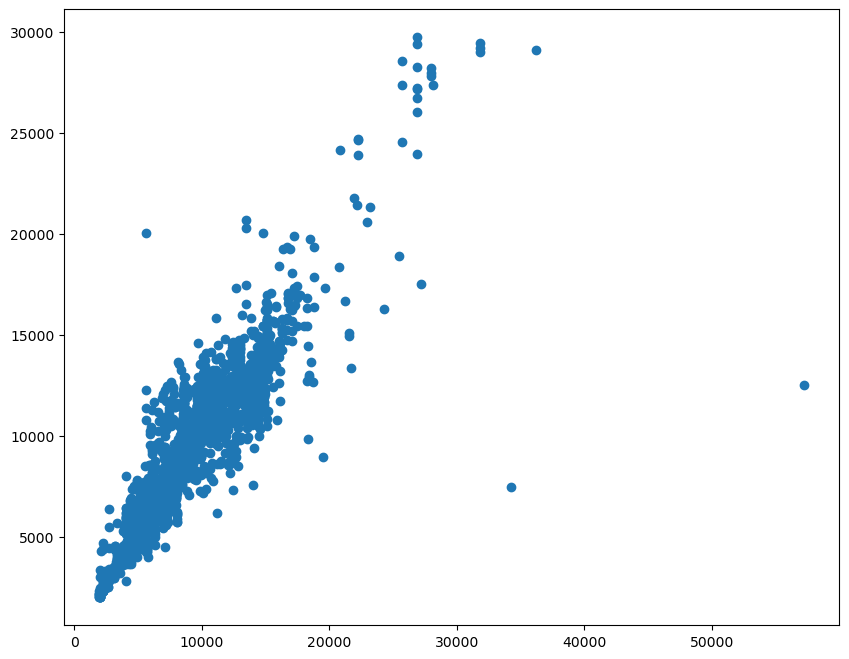

In [217]:
plt.figure(figsize=(10, 8))
plt.scatter(ytest, prediction)
plt.show()

In [218]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(ytest, prediction))
print(mean_absolute_error(ytest, prediction))
print(mean_squared_error(ytest, prediction))
print(np.sqrt(mean_squared_error(ytest, prediction)))

0.807135112918296
1194.1206224546759
4158563.5582088046
2039.2556382682394


In [219]:
import pickle

file = open('flight_demo.pkl', 'wb')

pickle.dump(rf_random, file)

In [220]:
model = open('flight_demo.pkl', 'rb')
forest = pickle.load(model)

In [221]:
y_prediction = forest.predict(xtest)

In [222]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(ytest, y_prediction))
print(mean_absolute_error(ytest, y_prediction))
print(mean_squared_error(ytest, y_prediction))
print(np.sqrt(mean_squared_error(ytest, y_prediction)))

0.807135112918296
1194.1206224546759
4158563.5582088046
2039.2556382682394


In [223]:
import pickle 

file = open('model_1.pkl', 'wb')
pickle.dump(rf_random,file)

In [224]:
model = open('model_1.pkl', 'rb')
forest = pickle.load(model)

In [225]:
data_train.shape

(10682, 30)

In [226]:
data_test.shape

(2671, 29)

In [227]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [228]:
data_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hour', 'Duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [229]:
data_test['Airline_Trujet'] = 0

In [230]:
data_test.shape

(2671, 29)

In [231]:
y_test_pred = forest.predict(data_test)

In [232]:
data_test['Price'] = y_test_pred
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,12068.035185
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4310.938471
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,14708.381719
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,10917.623921
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4021.101109
